In [ ]:
import zipfile as zf
files=zf.ZipFile("./dataset.zip",'r')
files.extractall('tmp/faces')
files.close()

files=zf.ZipFile("./song.zip",'r')
files.extractall('tmp/songs')

In [ ]:
import tensorflow as tf

model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("tmp/faces/train",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("tmp/faces/test",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')


train_dataset.class_indices
test_dataset.class_indices

Found 12045 images belonging to 2 classes.
Found 3021 images belonging to 2 classes.


{'happy': 0, 'sad': 1}

In [ ]:
h1=model.fit(train_dataset,
         steps_per_epoch = 250,
         epochs = 10,
         validation_data = test_dataset
         )

Epoch 1/10
250/250 [==============================] - 22s 40ms/step - loss: 0.6548 - accuracy: 0.6205 - val_loss: 0.5690 - val_accuracy: 0.7067
Epoch 2/10
250/250 [==============================] - 9s 36ms/step - loss: 0.5412 - accuracy: 0.7213 - val_loss: 0.4931 - val_accuracy: 0.7431
Epoch 3/10
250/250 [==============================] - 8s 32ms/step - loss: 0.4643 - accuracy: 0.7715 - val_loss: 0.4685 - val_accuracy: 0.7769
Epoch 4/10
250/250 [==============================] - 10s 39ms/step - loss: 0.4084 - accuracy: 0.8064 - val_loss: 0.4010 - val_accuracy: 0.8156
Epoch 5/10
250/250 [==============================] - 9s 36ms/step - loss: 0.3669 - accuracy: 0.8290 - val_loss: 0.3734 - val_accuracy: 0.8256
Epoch 6/10
250/250 [==============================] - 8s 31ms/step - loss: 0.3251 - accuracy: 0.8518 - val_loss: 0.3563 - val_accuracy: 0.8428
Epoch 7/10
250/250 [==============================] - 9s 36ms/step - loss: 0.2947 - accuracy: 0.8672 - val_loss: 0.3511 - val_accuracy: 0.85

In [ ]:
import numpy as np
from IPython.display import Audio
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import os
uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=load_img(path, target_size=(150,150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]<0.5:
    print(fn + " Happy")
    sd="tmp/songs/happy"

  else:
    print(fn + " Sad")
    sd="tmp/songs/sad"
  def recomd(song_file):
    song_path = os.path.join(sd, song_file)
    return Audio(song_path)
  song_list = [file for file in os.listdir(sd) if file.endswith(('.mp3', '.wav', '.ogg', '.flac'))]

  for song in song_list:
    print(f"Playing {song}")
    display(recomd(song))

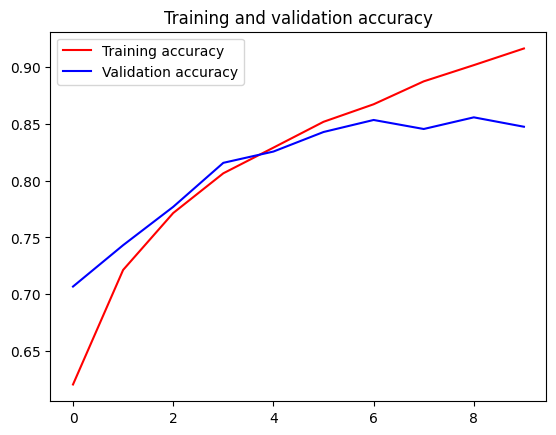

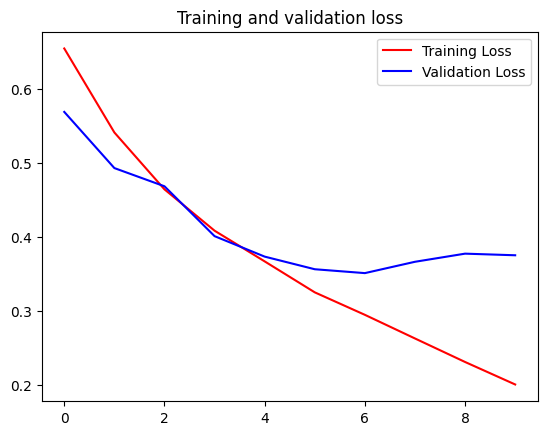

In [ ]:
import matplotlib.pyplot as plt

acc = h1.history['accuracy']
val_acc = h1.history['val_accuracy']
loss = h1.history['loss']
val_loss = h1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()